# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Predictive-Analytics-for-Finance" data-toc-modified-id="Predictive-Analytics-for-Finance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive Analytics for Finance</a></div><div class="lev2 toc-item"><a href="#Structured-Data" data-toc-modified-id="Structured-Data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Structured Data</a></div><div class="lev3 toc-item"><a href="#LSTM" data-toc-modified-id="LSTM-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>LSTM</a></div><div class="lev4 toc-item"><a href="#Plot-:-Raw" data-toc-modified-id="Plot-:-Raw-1111"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Plot : Raw</a></div><div class="lev4 toc-item"><a href="#Plot-:-Considering-foresight" data-toc-modified-id="Plot-:-Considering-foresight-1112"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Plot : Considering <code>foresight</code></a></div><div class="lev4 toc-item"><a href="#Plot-:-Considering-foresight-and-1-day" data-toc-modified-id="Plot-:-Considering-foresight-and-1-day-1113"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>Plot : Considering <code>foresight</code> and 1 day</a></div>

# Predictive Analytics for Finance

In [1]:
import numpy as np
import pandas as pd
import re
import json
from pprint import pprint
from glob import glob
import itertools as it
import datetime as dt
import pickle
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

import feedparser
import urllib
from bs4 import BeautifulSoup as bs
import pandas_datareader as pdr

import nltk
import konlpy as knlp
from konlpy.corpus import kolaw, kobill
from konlpy.tag import Hannanum, Kkma, Twitter

import soynlp
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer, MaxScoreTokenizer
from soynlp.noun import LRNounExtractor

import gensim

%matplotlib inline

# Fonts
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic_Coding.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

## Structured Data

In [2]:
kospi_data = pd.read_csv('kospi/kospi200_20170101_20171130.csv', index_col=['Date'])
kospi_data.index = pd.to_datetime(kospi_data.index)
kospi_data

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,221.67,223.49,221.66,223.49,85967000
2010-01-05,224.24,224.40,222.18,222.84,153282000
2010-01-06,223.83,224.96,223.52,224.67,170500000
2010-01-07,224.23,224.77,221.31,221.31,183416000
2010-01-08,222.65,222.81,219.15,222.66,157255000
2010-01-11,223.31,224.18,222.23,222.23,155386000
2010-01-12,222.50,223.39,220.86,223.04,121230000
2010-01-13,220.82,221.46,219.01,219.17,116028000
2010-01-14,220.39,222.24,219.88,221.19,134055000


In [3]:
from pandas_datareader.google.daily import GoogleDailyReader

class FixedGoogleDailyReader(GoogleDailyReader):
    @property
    def url(self):
        return 'http://finance.google.com/finance/historical'

In [4]:
filename = 'kospi/kospi_20000101_20171130.csv'

In [5]:
start_dt = dt.datetime(2003, 1, 1)
end_dt = dt.datetime(2017, 11, 30)
kospi_data = FixedGoogleDailyReader('KRX:KOSPI', start_dt, end_dt).read()
kospi_data.to_csv(filename)
kospi_data

,Open,High,Low,Close,Volume
Date,,,,,
2003-01-02,633.03,637.10,623.75,635.17,742864400
2003-01-03,651.59,662.40,649.62,661.10,1005749500
2003-01-06,665.10,667.71,657.61,666.71,721798300
2003-01-07,679.00,679.30,652.14,652.20,690116500
2003-01-08,655.97,660.39,650.93,651.72,604873200
2003-01-09,643.50,644.43,630.40,630.40,627178200
2003-01-10,643.28,644.48,618.68,628.36,700708600
2003-01-13,627.01,648.06,624.46,648.06,847846300
2003-01-14,645.66,652.63,639.91,650.05,712860700


In [6]:
data = kospi_data.loc[kospi_data.index >= dt.datetime(2017, 11, 1)]
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-01,2535.97,2556.47,2535.83,2556.47,361796000
2017-11-02,2560.34,2561.63,2542.02,2546.36,527727000
2017-11-03,2558.37,2558.37,2539.72,2557.97,292766000
2017-11-06,2557.29,2559.90,2529.94,2549.41,221187000
2017-11-07,2548.30,2554.13,2540.67,2545.44,253921000
2017-11-08,2534.48,2558.74,2533.73,2552.40,277039000
2017-11-09,2559.93,2559.93,2536.54,2550.57,293539000
2017-11-10,2541.18,2547.61,2534.60,2542.95,291525000
2017-11-13,2548.27,2552.28,2527.20,2530.35,266530000


### LSTM

In [7]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, RepeatVector
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [8]:
look_back = 10
foresight = 7

In [9]:
def preprocessor(filename, x_col=None, y_col=None, test_ratio=.5, look_back=1, foresight=1):
    
    ndimX = len(x_col)
    ndimY = len(y_col)
    
    # file loader
    pandf = pd.read_csv(filename, index_col="Date")
 
    # convert nparray
    nparr_X = pandf[x_col].values[::1].reshape(-1, ndimX)
    nparr_X.astype('float32')
    nparr_Y = pandf[y_col].values[::1].reshape(-1, ndimY)
    nparr_Y.astype('float32') 

    # normalization
    scalerX = MinMaxScaler(feature_range=(0, 1))
    scalerY = MinMaxScaler(feature_range=(0, 1))
    nptf_X = scalerX.fit_transform(nparr_X)
    nptf_Y = scalerY.fit_transform(nparr_Y)
 
    # split train, test
    train_size = int(pandf.shape[0] * (1 - test_ratio))
    test_size = pandf.shape[0] - train_size
    
    # reshape input to be [samples, time steps, features]
    nptf_X_new = np.array([nptf_X[i:i+look_back]\
                           for i in range(len(nptf_X) - look_back - foresight)])
    trainX, testX = nptf_X_new[:train_size], nptf_X_new[train_size:]

    nptf_Y_new = nptf_Y[look_back + foresight:]
    trainY, testY = nptf_Y_new[:train_size], nptf_Y_new[train_size:]
    

    print('X :', len(trainX), len(testX))
    print('Y :', len(trainY), len(testY))
    
    
    return ndimX, scalerX, scalerY, trainX, trainY, testX, testY

In [10]:
ndimX, scalerX, scalerY, trainX, trainY, testX, testY = preprocessor(filename, x_col=['Open', 'High', 'Low'], y_col=['Close'], test_ratio=.8, look_back=look_back, foresight=7)

X : 738 2938
Y : 738 2938


In [11]:
pd.read_csv(filename, index_col="Date").iloc[:20]

,Open,High,Low,Close,Volume
Date,,,,,
2003-01-02,633.03,637.10,623.75,635.17,742864400
2003-01-03,651.59,662.40,649.62,661.10,1005749500
2003-01-06,665.10,667.71,657.61,666.71,721798300
2003-01-07,679.00,679.30,652.14,652.20,690116500
2003-01-08,655.97,660.39,650.93,651.72,604873200
2003-01-09,643.50,644.43,630.40,630.40,627178200
2003-01-10,643.28,644.48,618.68,628.36,700708600
2003-01-13,627.01,648.06,624.46,648.06,847846300
2003-01-14,645.66,652.63,639.91,650.05,712860700


In [12]:
for _ in range(5):
    print(scalerX.inverse_transform(trainX[_]), scalerY.inverse_transform(trainY[_:_ + 1]))

[[ 633.03  637.1   623.75]
 [ 651.59  662.4   649.62]
 [ 665.1   667.71  657.61]
 [ 679.    679.3   652.14]
 [ 655.97  660.39  650.93]
 [ 643.5   644.43  630.4 ]
 [ 643.28  644.48  618.68]
 [ 627.01  648.06  624.46]
 [ 645.66  652.63  639.91]
 [ 656.23  659.05  643.52]] [[ 593.09]]
[[ 651.59  662.4   649.62]
 [ 665.1   667.71  657.61]
 [ 679.    679.3   652.14]
 [ 655.97  660.39  650.93]
 [ 643.5   644.43  630.4 ]
 [ 643.28  644.48  618.68]
 [ 627.01  648.06  624.46]
 [ 645.66  652.63  639.91]
 [ 656.23  659.05  643.52]
 [ 639.56  649.54  635.79]] [[ 600.56]]
[[ 665.1   667.71  657.61]
 [ 679.    679.3   652.14]
 [ 655.97  660.39  650.93]
 [ 643.5   644.43  630.4 ]
 [ 643.28  644.48  618.68]
 [ 627.01  648.06  624.46]
 [ 645.66  652.63  639.91]
 [ 656.23  659.05  643.52]
 [ 639.56  649.54  635.79]
 [ 640.31  649.1   636.46]] [[ 583.35]]
[[ 679.    679.3   652.14]
 [ 655.97  660.39  650.93]
 [ 643.5   644.43  630.4 ]
 [ 643.28  644.48  618.68]
 [ 627.01  648.06  624.46]
 [ 645.66  652.6

In [13]:
ndim = trainX.shape[2]

# simple lstm network learning
model = Sequential()
model.add(LSTM(128, input_shape=(look_back, ndim),
               dropout=0, recurrent_dropout=.3,))
model.add(Dense(trainY.shape[1]))
#model.add(RepeatVector(look_back))
#model.add(Flatten())
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
fitted = model.fit(trainX, trainY, epochs=700, batch_size=100, verbose=2,
                   validation_data=(testX, testY), shuffle=False)
#fitted = model.fit(trainX, trainY, epochs=1000, batch_size=100, verbose=2, shuffle=False)
# Verbose 1 for progress bar, 2 for one line per epoch

Train on 738 samples, validate on 2938 samples
Epoch 1/700
 - 1s - loss: 0.0040 - mean_absolute_error: 0.0539 - val_loss: 0.0075 - val_mean_absolute_error: 0.0802
Epoch 2/700
 - 0s - loss: 0.0037 - mean_absolute_error: 0.0539 - val_loss: 0.0227 - val_mean_absolute_error: 0.1422
Epoch 3/700
 - 0s - loss: 6.1148e-04 - mean_absolute_error: 0.0192 - val_loss: 0.0017 - val_mean_absolute_error: 0.0336
Epoch 4/700
 - 0s - loss: 8.7888e-04 - mean_absolute_error: 0.0243 - val_loss: 0.0012 - val_mean_absolute_error: 0.0256
Epoch 5/700
 - 0s - loss: 4.6631e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0011 - val_mean_absolute_error: 0.0243
Epoch 6/700
 - 0s - loss: 3.9661e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0058 - val_mean_absolute_error: 0.0669
Epoch 7/700
 - 0s - loss: 3.5309e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0025 - val_mean_absolute_error: 0.0398
Epoch 8/700
 - 0s - loss: 3.6891e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0046 - val_mean_absolute_error: 0.0587
E

Epoch 69/700
 - 0s - loss: 2.7655e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0036 - val_mean_absolute_error: 0.0501
Epoch 70/700
 - 0s - loss: 2.7596e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0035 - val_mean_absolute_error: 0.0497
Epoch 71/700
 - 0s - loss: 2.7620e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0036 - val_mean_absolute_error: 0.0507
Epoch 72/700
 - 0s - loss: 2.7571e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0036 - val_mean_absolute_error: 0.0504
Epoch 73/700
 - 0s - loss: 2.7587e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0037 - val_mean_absolute_error: 0.0511
Epoch 74/700
 - 0s - loss: 2.7543e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0037 - val_mean_absolute_error: 0.0510
Epoch 75/700
 - 0s - loss: 2.7557e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0038 - val_mean_absolute_error: 0.0517
Epoch 76/700
 - 0s - loss: 2.7515e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0038 - val_mean_absolute_error: 0.0516
Epoch 77/700
 - 0s - loss: 2.752

Epoch 137/700
 - 0s - loss: 2.6510e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0043 - val_mean_absolute_error: 0.0553
Epoch 138/700
 - 0s - loss: 2.6497e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0043 - val_mean_absolute_error: 0.0552
Epoch 139/700
 - 0s - loss: 2.6493e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0043 - val_mean_absolute_error: 0.0556
Epoch 140/700
 - 0s - loss: 2.6481e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0043 - val_mean_absolute_error: 0.0556
Epoch 141/700
 - 0s - loss: 2.6477e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0043 - val_mean_absolute_error: 0.0559
Epoch 142/700
 - 0s - loss: 2.6465e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0044 - val_mean_absolute_error: 0.0559
Epoch 143/700
 - 0s - loss: 2.6460e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0044 - val_mean_absolute_error: 0.0562
Epoch 144/700
 - 0s - loss: 2.6449e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0044 - val_mean_absolute_error: 0.0563
Epoch 145/700
 - 0s - lo

Epoch 205/700
 - 0s - loss: 6.4356e-04 - mean_absolute_error: 0.0197 - val_loss: 0.0055 - val_mean_absolute_error: 0.0639
Epoch 206/700
 - 0s - loss: 6.8813e-04 - mean_absolute_error: 0.0218 - val_loss: 0.0013 - val_mean_absolute_error: 0.0280
Epoch 207/700
 - 0s - loss: 5.1803e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0056 - val_mean_absolute_error: 0.0651
Epoch 208/700
 - 0s - loss: 5.2343e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0015 - val_mean_absolute_error: 0.0298
Epoch 209/700
 - 0s - loss: 4.4365e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0059 - val_mean_absolute_error: 0.0670
Epoch 210/700
 - 0s - loss: 3.9759e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0015 - val_mean_absolute_error: 0.0300
Epoch 211/700
 - 0s - loss: 2.9947e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0059 - val_mean_absolute_error: 0.0671
Epoch 212/700
 - 0s - loss: 2.7942e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0027 - val_mean_absolute_error: 0.0422
Epoch 213/700
 - 0s - lo

Epoch 273/700
 - 0s - loss: 2.5445e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0050 - val_mean_absolute_error: 0.0601
Epoch 274/700
 - 0s - loss: 2.5441e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0050 - val_mean_absolute_error: 0.0602
Epoch 275/700
 - 0s - loss: 2.5437e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0050 - val_mean_absolute_error: 0.0602
Epoch 276/700
 - 0s - loss: 2.5434e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0050 - val_mean_absolute_error: 0.0603
Epoch 277/700
 - 0s - loss: 2.5430e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0050 - val_mean_absolute_error: 0.0604
Epoch 278/700
 - 0s - loss: 2.5426e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0050 - val_mean_absolute_error: 0.0605
Epoch 279/700
 - 0s - loss: 2.5422e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0051 - val_mean_absolute_error: 0.0605
Epoch 280/700
 - 0s - loss: 2.5418e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0051 - val_mean_absolute_error: 0.0606
Epoch 281/700
 - 0s - lo

Epoch 341/700
 - 0s - loss: 5.7712e-04 - mean_absolute_error: 0.0210 - val_loss: 0.0059 - val_mean_absolute_error: 0.0671
Epoch 342/700
 - 0s - loss: 6.7756e-04 - mean_absolute_error: 0.0205 - val_loss: 0.0032 - val_mean_absolute_error: 0.0468
Epoch 343/700
 - 0s - loss: 6.1183e-04 - mean_absolute_error: 0.0212 - val_loss: 0.0027 - val_mean_absolute_error: 0.0428
Epoch 344/700
 - 0s - loss: 5.9907e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0053 - val_mean_absolute_error: 0.0624
Epoch 345/700
 - 0s - loss: 6.5383e-04 - mean_absolute_error: 0.0213 - val_loss: 0.0016 - val_mean_absolute_error: 0.0309
Epoch 346/700
 - 0s - loss: 5.3086e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0058 - val_mean_absolute_error: 0.0663
Epoch 347/700
 - 0s - loss: 5.3738e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0014 - val_mean_absolute_error: 0.0292
Epoch 348/700
 - 0s - loss: 4.2493e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0061 - val_mean_absolute_error: 0.0685
Epoch 349/700
 - 0s - lo

Epoch 409/700
 - 0s - loss: 2.4875e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0049 - val_mean_absolute_error: 0.0594
Epoch 410/700
 - 0s - loss: 2.4873e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0049 - val_mean_absolute_error: 0.0595
Epoch 411/700
 - 0s - loss: 2.4871e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0049 - val_mean_absolute_error: 0.0596
Epoch 412/700
 - 0s - loss: 2.4869e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0049 - val_mean_absolute_error: 0.0596
Epoch 413/700
 - 0s - loss: 2.4867e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0049 - val_mean_absolute_error: 0.0597
Epoch 414/700
 - 0s - loss: 2.4865e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0049 - val_mean_absolute_error: 0.0597
Epoch 415/700
 - 0s - loss: 2.4863e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0049 - val_mean_absolute_error: 0.0598
Epoch 416/700
 - 0s - loss: 2.4861e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0049 - val_mean_absolute_error: 0.0599
Epoch 417/700
 - 0s - lo

Epoch 477/700
 - 0s - loss: 2.9796e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0053 - val_mean_absolute_error: 0.0618
Epoch 478/700
 - 0s - loss: 3.1856e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0046 - val_mean_absolute_error: 0.0572
Epoch 479/700
 - 0s - loss: 3.6253e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0053 - val_mean_absolute_error: 0.0619
Epoch 480/700
 - 0s - loss: 4.1426e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0036 - val_mean_absolute_error: 0.0501
Epoch 481/700
 - 0s - loss: 4.7085e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0052 - val_mean_absolute_error: 0.0614
Epoch 482/700
 - 0s - loss: 5.6642e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0024 - val_mean_absolute_error: 0.0392
Epoch 483/700
 - 0s - loss: 5.9336e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0053 - val_mean_absolute_error: 0.0624
Epoch 484/700
 - 0s - loss: 7.1231e-04 - mean_absolute_error: 0.0223 - val_loss: 0.0013 - val_mean_absolute_error: 0.0283
Epoch 485/700
 - 0s - lo

Epoch 545/700
 - 0s - loss: 2.4573e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0048 - val_mean_absolute_error: 0.0591
Epoch 546/700
 - 0s - loss: 2.4572e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0048 - val_mean_absolute_error: 0.0591
Epoch 547/700
 - 0s - loss: 2.4571e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0048 - val_mean_absolute_error: 0.0592
Epoch 548/700
 - 0s - loss: 2.4569e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0048 - val_mean_absolute_error: 0.0593
Epoch 549/700
 - 0s - loss: 2.4568e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0049 - val_mean_absolute_error: 0.0593
Epoch 550/700
 - 0s - loss: 2.4567e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0049 - val_mean_absolute_error: 0.0594
Epoch 551/700
 - 0s - loss: 2.4566e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0049 - val_mean_absolute_error: 0.0594
Epoch 552/700
 - 0s - loss: 2.4565e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0049 - val_mean_absolute_error: 0.0595
Epoch 553/700
 - 0s - lo

Epoch 613/700
 - 0s - loss: 2.4761e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0052 - val_mean_absolute_error: 0.0617
Epoch 614/700
 - 0s - loss: 2.4712e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0051 - val_mean_absolute_error: 0.0611
Epoch 615/700
 - 0s - loss: 2.5119e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0052 - val_mean_absolute_error: 0.0618
Epoch 616/700
 - 0s - loss: 2.5164e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0051 - val_mean_absolute_error: 0.0608
Epoch 617/700
 - 0s - loss: 2.6019e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0052 - val_mean_absolute_error: 0.0617
Epoch 618/700
 - 0s - loss: 2.6436e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0049 - val_mean_absolute_error: 0.0597
Epoch 619/700
 - 0s - loss: 2.8216e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0052 - val_mean_absolute_error: 0.0617
Epoch 620/700
 - 0s - loss: 2.9716e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0045 - val_mean_absolute_error: 0.0569
Epoch 621/700
 - 0s - lo

Epoch 681/700
 - 0s - loss: 2.4368e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0047 - val_mean_absolute_error: 0.0585
Epoch 682/700
 - 0s - loss: 2.4367e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0047 - val_mean_absolute_error: 0.0585
Epoch 683/700
 - 0s - loss: 2.4366e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0047 - val_mean_absolute_error: 0.0586
Epoch 684/700
 - 0s - loss: 2.4365e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0047 - val_mean_absolute_error: 0.0587
Epoch 685/700
 - 0s - loss: 2.4364e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0048 - val_mean_absolute_error: 0.0587
Epoch 686/700
 - 0s - loss: 2.4364e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0048 - val_mean_absolute_error: 0.0588
Epoch 687/700
 - 0s - loss: 2.4363e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0048 - val_mean_absolute_error: 0.0588
Epoch 688/700
 - 0s - loss: 2.4362e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0048 - val_mean_absolute_error: 0.0589
Epoch 689/700
 - 0s - lo

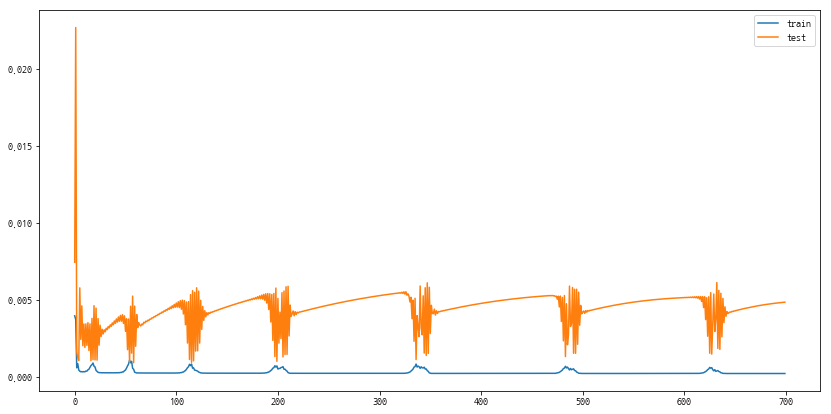

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
ax.plot(fitted.history['loss'], label='train')
if fitted.history['val_loss']:
    ax.plot(fitted.history['val_loss'], label='test')
ax.legend()

In [15]:
len(trainX), len(trainY)

(738, 738)

In [16]:
len(testX), len(testY)

(2938, 2938)

In [17]:
train_y_hat = scalerY.inverse_transform(model.predict(trainX))
train_y = scalerY.inverse_transform(trainY)
train_score = math.sqrt(mean_squared_error(train_y, train_y_hat))
print('Training Score: %.2f RMSE' % train_score)

Training Score: 31.78 RMSE


In [18]:
# make prediction
test_y_hat = scalerY.inverse_transform(model.predict(testX))
test_y = scalerY.inverse_transform(testY)
test_score = math.sqrt(mean_squared_error(test_y, test_y_hat))
print('Test Score: %.2f RMSE' % test_score)

Test Score: 142.53 RMSE


In [19]:
y_hat = np.append(train_y_hat, test_y_hat)
y = np.append(train_y, test_y)

In [20]:
# predict last value (or tomorrow?)
lastX = testX[-1]
lastY = testY[:-1]

print('Input: ')
print(scalerX.inverse_transform(testX[-1]))
realX = lastX.reshape((1, look_back, ndim))

realY = scalerY.inverse_transform(lastY)
predY = scalerY.inverse_transform(model.predict(realX))
print('\nPredict the Close value of the final day')
print('Predict:', predY.reshape(1)[0])  # 데이터 입력 마지막 다음날 종가 예측
print('Real   :', realY[-1].reshape(1)[0])

Input: 
[[ 2548.3   2554.13  2540.67]
 [ 2534.48  2558.74  2533.73]
 [ 2559.93  2559.93  2536.54]
 [ 2541.18  2547.61  2534.6 ]
 [ 2548.27  2552.28  2527.2 ]
 [ 2532.55  2532.95  2520.99]
 [ 2525.6   2526.61  2511.76]
 [ 2522.42  2538.28  2514.51]
 [ 2546.05  2559.1   2533.99]
 [ 2536.8   2542.62  2523.52]]

Predict the Close value of the final day
Predict: 2824.13
Real   : 2512.9


#### Plot : Raw

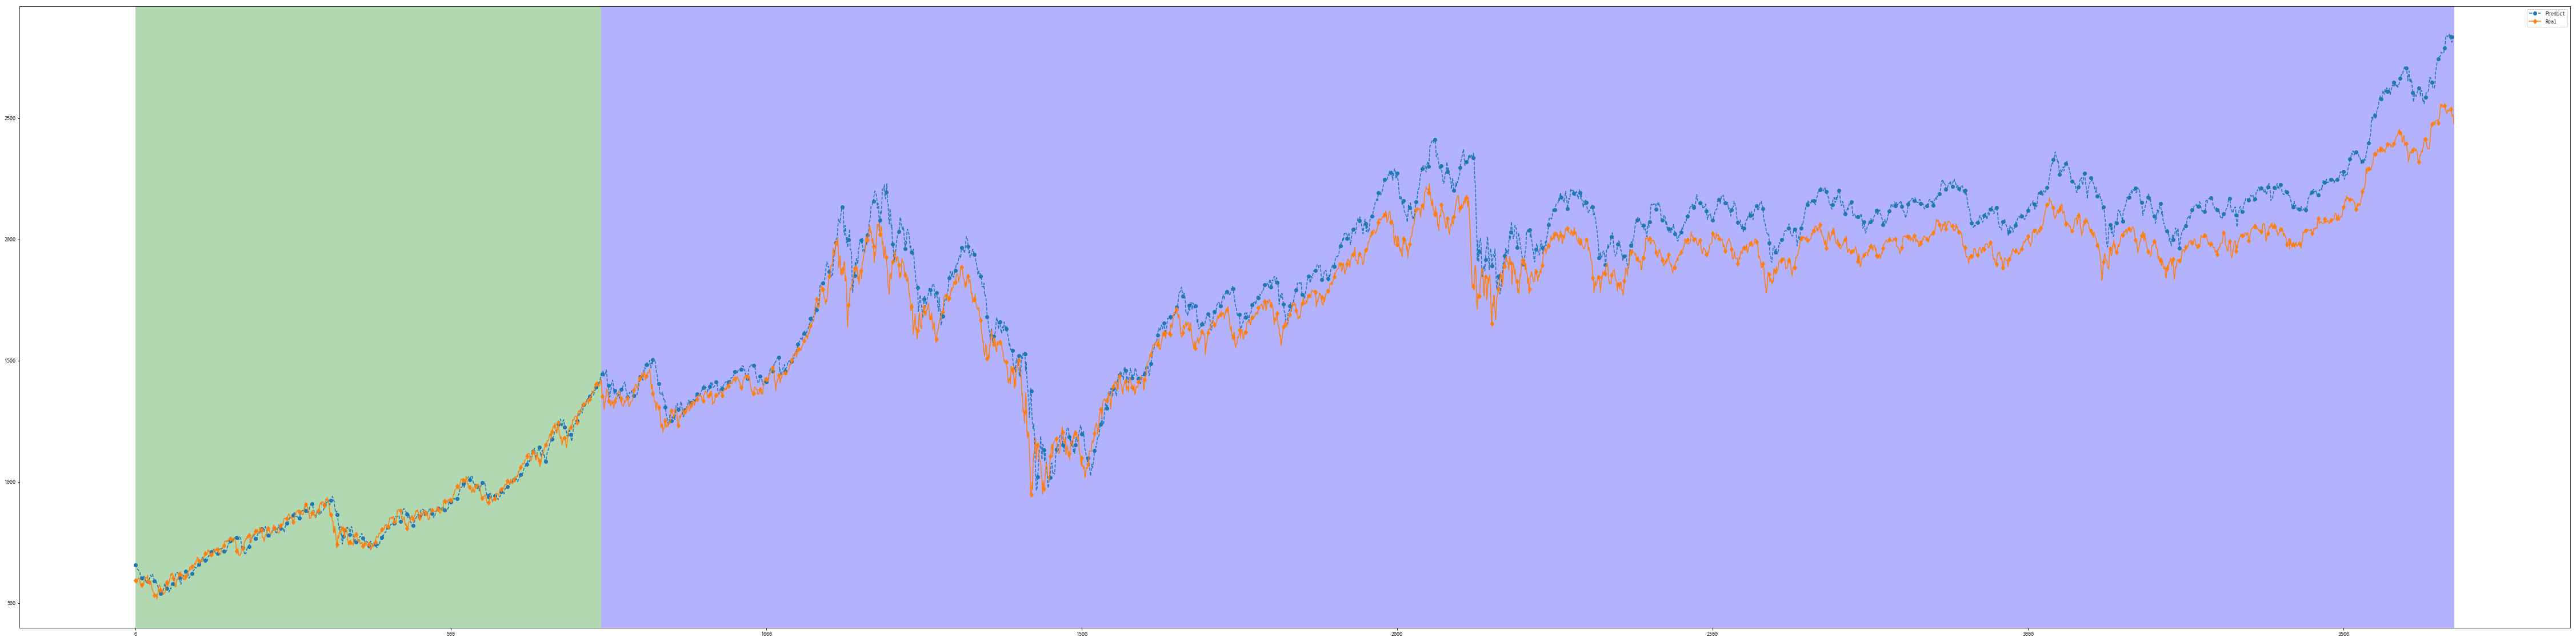

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80, 20))
ax.plot(y_hat, label='Predict', linestyle='--', marker='o', markevery=list(range(0, len(y_hat), 10)))
ax.plot(y, label='Real', marker='d', markevery=list(range(0, len(y), 10)))
ax.legend()
ax.axvspan(0, len(train_y), facecolor='green', alpha=0.3)
ax.axvspan(len(train_y), len(y), facecolor='blue', alpha=0.3)

#### Plot : Considering `foresight`

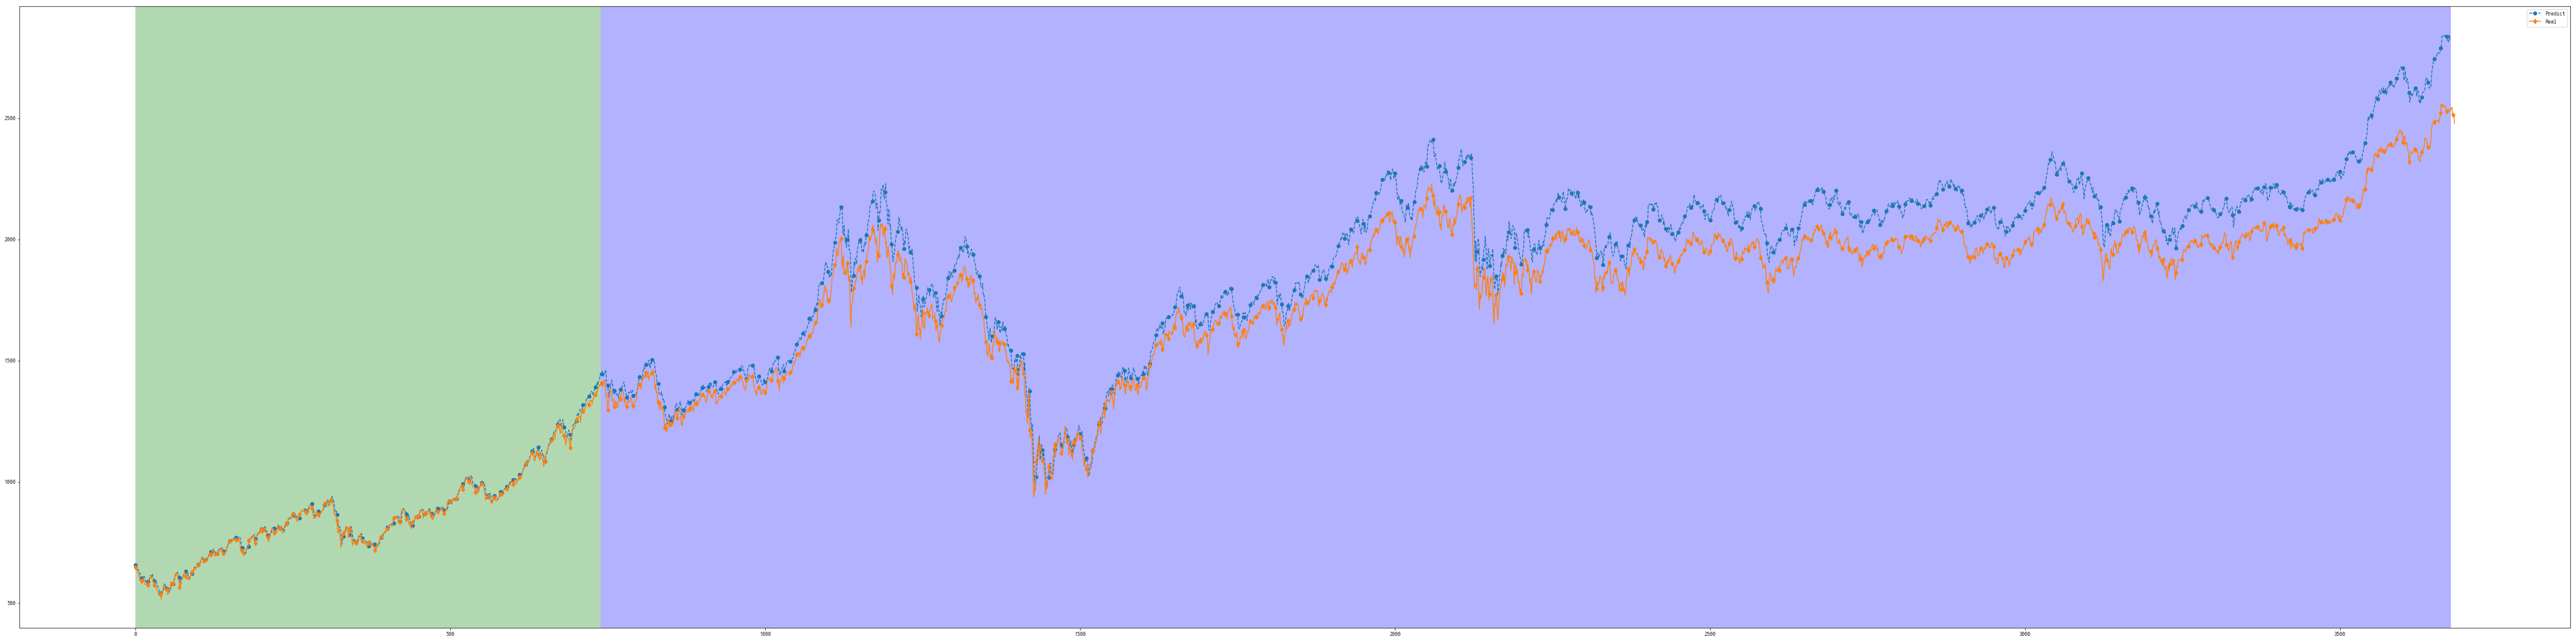

In [22]:
y_ontime = kospi_data['Close'][len(kospi_data) - len(y) - foresight:].values.reshape((-1, 1))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80, 20))
ax.plot(y_hat, label='Predict', linestyle='--', marker='o', markevery=list(range(0, len(y_hat), 10)))
ax.plot(y_ontime, label='Real', marker='d', markevery=list(range(0, len(y_ontime), 10)))
ax.legend()
ax.axvspan(0, len(train_y), facecolor='green', alpha=0.3)
ax.axvspan(len(train_y), len(y), facecolor='blue', alpha=0.3)

#### Plot : Considering `foresight` and 1 day

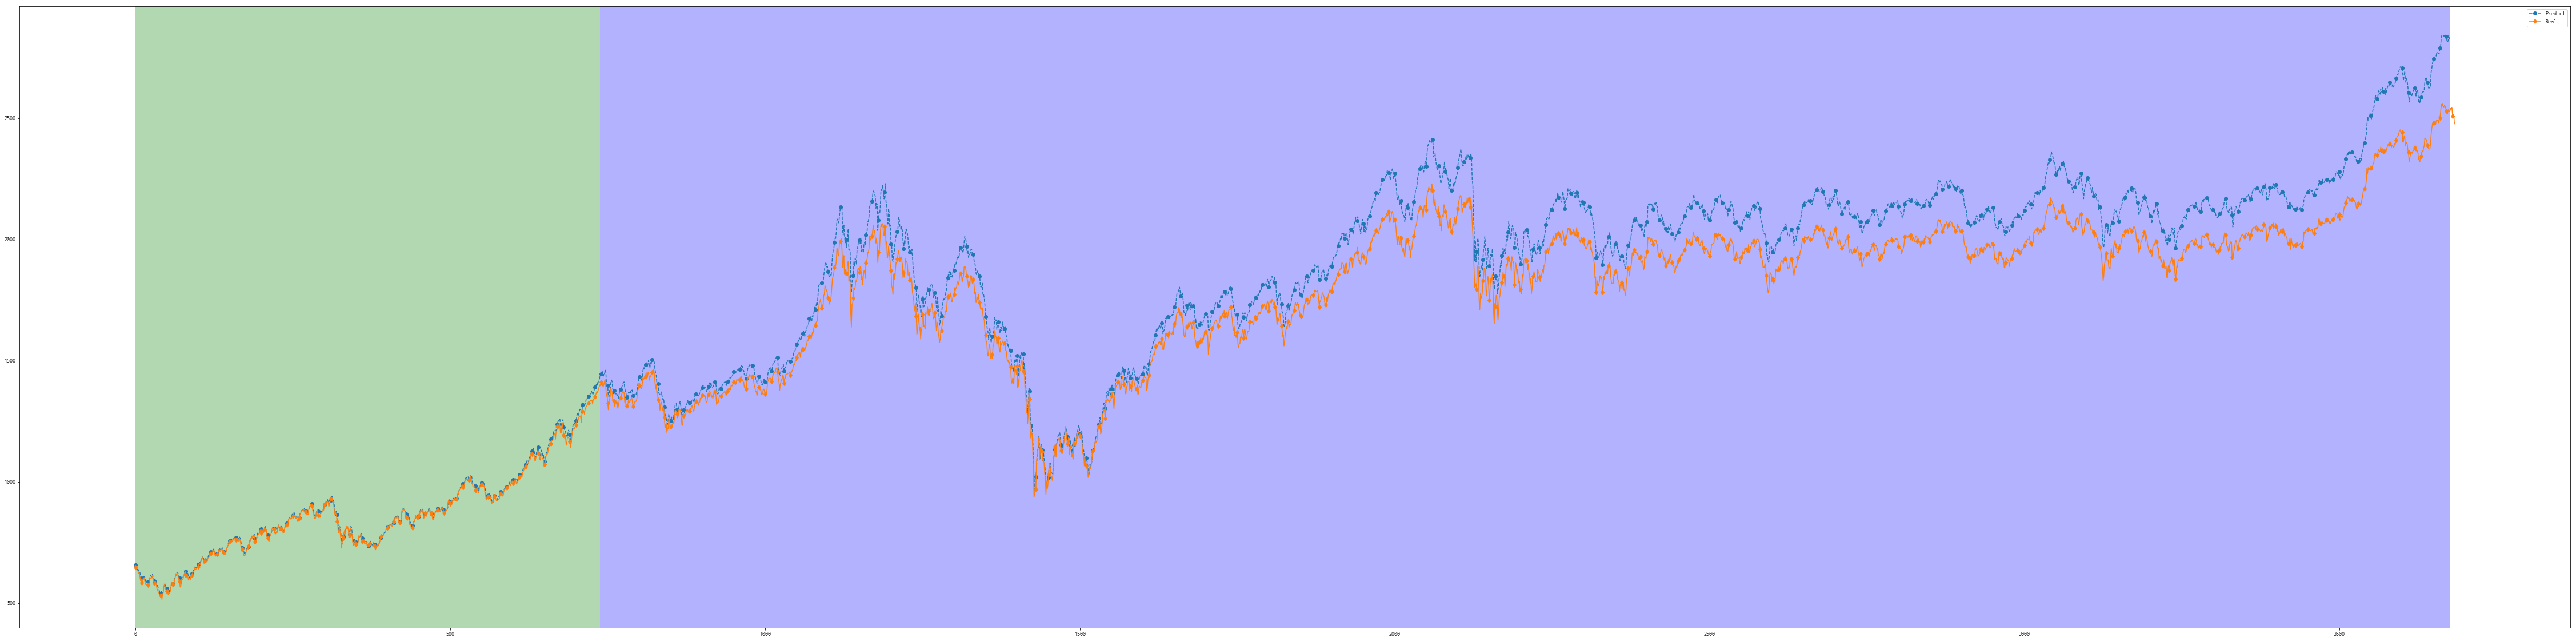

In [23]:
y_ontime = kospi_data['Close'][len(kospi_data) - len(y) - foresight -1:].values.reshape((-1, 1))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80, 20))
ax.plot(y_hat, label='Predict', linestyle='--', marker='o', markevery=list(range(0, len(y_hat), 10)))
ax.plot(y_ontime, label='Real', marker='d', markevery=list(range(0, len(y_ontime), 10)))
ax.legend()
ax.axvspan(0, len(train_y), facecolor='green', alpha=0.3)
ax.axvspan(len(train_y), len(y), facecolor='blue', alpha=0.3)

In [24]:
y_hat

array([  658.17266846,   650.37219238,   649.35656738, ...,  2819.15478516,
        2842.46801758,  2824.12719727], dtype=float32)

In [25]:
y

array([  593.09,   600.56,   583.35, ...,  2514.19,  2512.9 ,  2476.37])

In [26]:
y_ontime

array([[  648.29],
       [  648.69],
       [  636.46],
       ..., 
       [ 2514.19],
       [ 2512.9 ],
       [ 2476.37]])

Done.